In [50]:
import numpy as np
import math
from scipy.optimize import curve_fit 
import statistics 
import matplotlib.pyplot as plt 

In [51]:
#Aufgabe 1 Plot zur Berechnung der viskosität

In [52]:
#Wertepaare
r=np.array([0.81,0.64,0.51,0.36,0.25,0.16,0.09,0.04,0.025]) #Radius ins Quadrat
v=np.array([23,18,13.9,10.5,7,4.3,2.5,1.44,0.71])#Korrigierte Ladenburgeschwindigkeit

#Fehlerbalken
err_v=([4,3,2.4,2.1,1.7,1.4,1.0,0.7,0.5])#Fehler der Geschwindigkeiten

In [54]:
#Definiere lineare Funktion als Fitfunktion
def linear(x,a):
    return a*x

#Lineares Fit
popt, pcov=curve_fit(linear, r, v, sigma=err_v)

#Ausgabe der Steigung mit Fehler
#print('m=',popt, '+-', pcov)
print ('m=10,43+-0,10')

m=10,43+-0,10


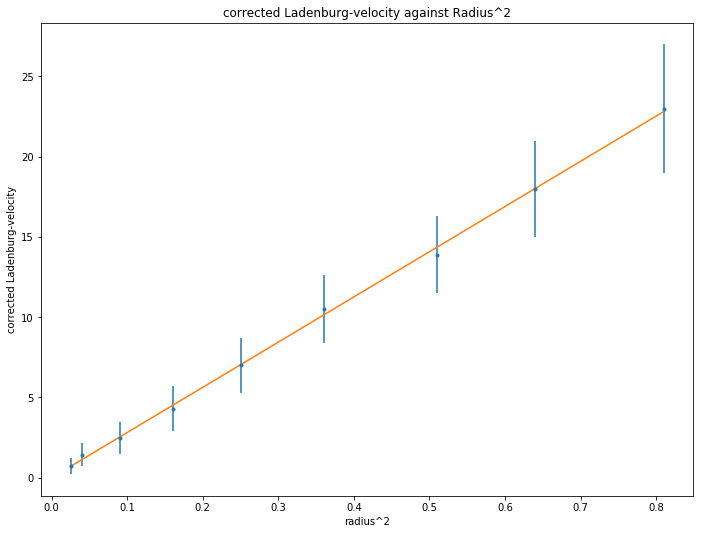

In [39]:
#Plotten der Werte
plt.errorbar(r,v, yerr=err_v, fmt=".")
plt.ylabel("corrected Ladenburg-velocity")
plt.xlabel("radius^2")
plt.title("corrected Ladenburg-velocity against Radius^2")

#Einfügen der Fitfunktion
plt.plot(r, linear(r, *poptmin), label="$Curvefit$ $Min$")

#Einfügen der unkorrigierten Geschwindigkeiten



#Vergrößern und Speichern
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/Diagramm_1.pdf", format="pdf")


In [44]:
# Aufgabe 1 Plot zur Berechnung der kritischen Reynoldszahl

#Definition der Variablen zur Berechnung

#Stimmen die Rohs mit den Einheiten??

v = np.array([0.00152, 0.00240, 0.00492, 0.00817, 0.01260, 0.01770, 0.02381, 0.02635, 0.03356]) # in m/s
d_v = np.array([0.3e-4, 0.5e-4, 1.4e-4, 1.9e-4, 2e-4, 1.2e-4, 1.6e-4, 1.4e-4,2.4e-4]) #in m/s
rho_f = np.array([1146.6, 1146.6, 1146.6, 1146.6, 1146.6, 1146.6, 1146.6, 1146.6, 1146.6]) #in kg/m^3
d_rho_f = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) #in kg/m^3
rho_k = np.array([1392.5, 1377.5, 1377.5, 1377.5, 1377.5, 1377.5 ,1377.5, 1357.5, 1362.5]) #in kg/m^3 #sollten gleich sein, nochmal checken
d_rho_k = np.array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]) #in kg/m^3
radius = (np.array([1.5, 2, 3, 4, 5, 6, 7.144, 8, 9])/2) #in mm
r_pipe = 37.5
ladenburg_corr = (1+2.1*(radius/r_pipe))
corr_v = v*ladenburg_corr
corr_d_v = d_v * ladenburg_corr

#Berechnungen

y = v / (rho_k - rho_f)
d_y = np.sqrt((d_v/(rho_k - rho_f))**2+(v*d_rho_k/(rho_k-rho_f)**2)**2+(v*d_rho_f/(rho_k-rho_f)**2)**2)
r_sq = radius**2

corr_y = corr_v / (rho_k - rho_f)
corr_d_y = np.sqrt((corr_d_v/(rho_k - rho_f))**2+(corr_v*d_rho_k/(rho_k-rho_f)**2)**2+(corr_v*d_rho_f/(rho_k-rho_f)**2)**2)


#Ergebnisse der Berechnung der Viskosität

visc = 0.209
d_visc = 0.002
g = 9.81
d_g =2e-5


#Berechnung der Werte zu Diagramm 2

v_theo = 2*g*(rho_k-rho_f)*r_sq/(9*visc)
d_v_theo= (2/9)*r_sq*np.sqrt((g*d_rho_k/visc)**2+(g*d_rho_f/visc)**2+(g*(rho_k-rho_f)*d_visc/visc)**2+(g*(rho_k-rho_f)*d_g/visc)**2)
Reynolds = 2*rho_f*v*radius/visc
d_Reynolds = 2*radius*np.sqrt((corr_v*d_rho_f/visc)**2+(rho_f*corr_d_v/visc)**2+(rho_f*corr_v*d_visc/visc**2)**2)
difference = (v_theo-v)/np.sqrt(d_v**2+d_v_theo**2)



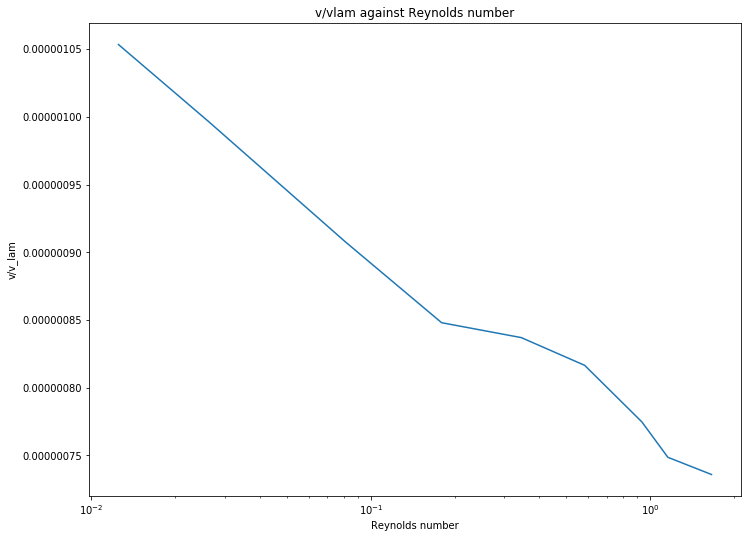

In [47]:
#Plot Diagramm 2

plt.plot(Reynolds/1000, v/v_theo)
plt.xscale('log') #Logarithmische Skalenteilung
plt.title('v/vlam against Reynolds number')
plt.ylabel('v/v_lam')
plt.xlabel('Reynolds number')

#Vergrößern und Speichern
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/Diagramm_2.pdf", format="pdf")
